In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import os

In [2]:
dataset_path = '../melanomaDataset/melanoma_cancer_dataset/train'

In [3]:
# Create an ImageDataGenerator for preprocessing and augmentation
datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Load and preprocess images in smaller batches
batch_size = 16
image_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=batch_size,  
    class_mode='binary',  # Since it's binary classification
    shuffle=False  
)

Found 9605 images belonging to 2 classes.


In [5]:
image_data = []
labels = []

# Iterate over batches to load and process images incrementally
for i in range(len(image_generator)):
    batch_images, batch_labels = image_generator[i]
    image_data.extend(batch_images)
    labels.extend(batch_labels)

In [6]:
# Convert lists to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)

In [7]:
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

In [8]:
print("Image Data Shape:", image_data.shape)
print("Labels Shape:", labels_encoded.shape)

Image Data Shape: (9605, 224, 224, 3)
Labels Shape: (9605,)


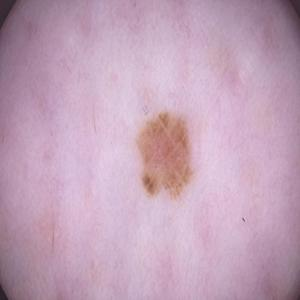

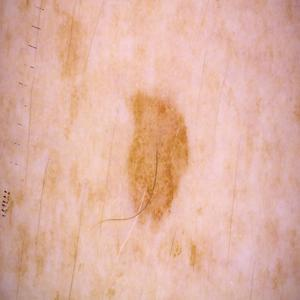

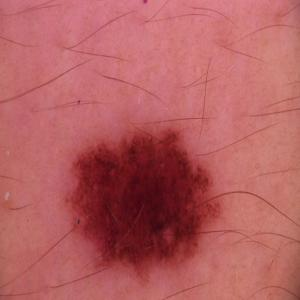

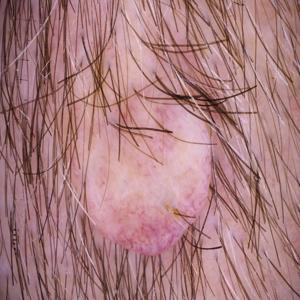

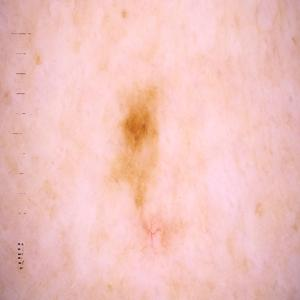

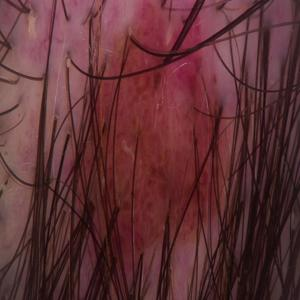

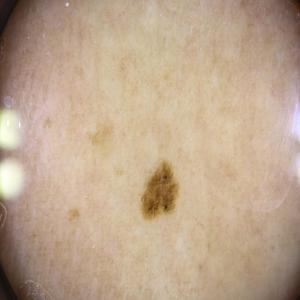

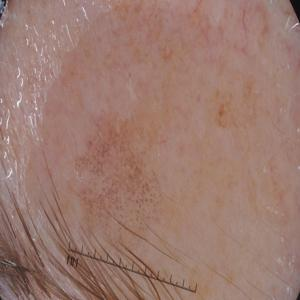

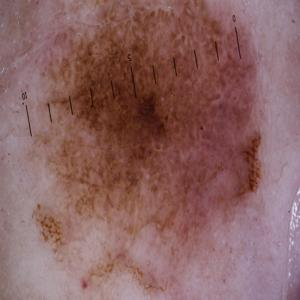

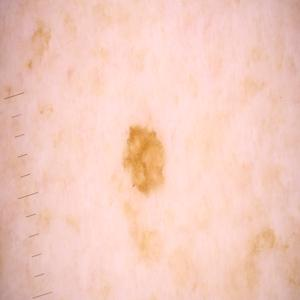

In [9]:
from IPython.display import Image

image_dir = '../melanomaDataset/melanoma_cancer_dataset/test/benign'

# List all image file names in the directory
image_files = os.listdir(image_dir)

# Display each image
for filename in image_files[:10]:
    image_path = os.path.join(image_dir, filename)
    display(Image(filename=image_path))

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_data, labels_encoded, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Data Shape: (7684, 224, 224, 3)
Testing Data Shape: (1921, 224, 224, 3)
Training Labels Shape: (7684,)
Testing Labels Shape: (1921,)


In [11]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_split=0.2)

model.save('skin_cancer_detection_model.keras')

Epoch 1/15
385/385 [==============================] - 341s 878ms/step - loss: 0.4317 - accuracy: 0.8022 - val_loss: 0.3922 - val_accuracy: 0.8321
Epoch 2/15
385/385 [==============================] - 336s 874ms/step - loss: 0.3157 - accuracy: 0.8686 - val_loss: 0.3023 - val_accuracy: 0.8595
Epoch 3/15
385/385 [==============================] - 326s 848ms/step - loss: 0.2822 - accuracy: 0.8861 - val_loss: 0.2834 - val_accuracy: 0.8712
Epoch 4/15
385/385 [==============================] - 325s 844ms/step - loss: 0.2762 - accuracy: 0.8821 - val_loss: 0.2606 - val_accuracy: 0.8900
Epoch 5/15
385/385 [==============================] - 324s 841ms/step - loss: 0.2594 - accuracy: 0.8941 - val_loss: 0.3068 - val_accuracy: 0.8647
Epoch 6/15
385/385 [==============================] - 327s 850ms/step - loss: 0.2529 - accuracy: 0.8926 - val_loss: 0.2504 - val_accuracy: 0.8966
Epoch 7/15
385/385 [==============================] - 339s 882ms/step - loss: 0.2242 - accuracy: 0.9113 - val_loss: 0.2491 -

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model = tf.keras.models.load_model('skin_cancer_detection_model.keras')
y_pred = model.predict(X_test)

y_pred_binary = np.round(y_pred)

accuracy=accuracy_score(y_test,y_pred_binary)

precision = precision_score(y_test, y_pred_binary)

recall = recall_score(y_test, y_pred_binary)

f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:",accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [15]:
test_dataset_path='../melanomaDataset/melanoma_cancer_dataset/test'

In [16]:
datagen_test = ImageDataGenerator(rescale=1./255)

In [17]:
batch_size = 16
image_generator = datagen_test.flow_from_directory(
    test_dataset_path,
    target_size=(224, 224),
    batch_size=batch_size,  
    class_mode='binary',  # Since it's binary classification
    shuffle=False  
)

Found 1000 images belonging to 2 classes.


In [31]:
image_data_test = []
labels_test = []

# Iterate over batches to load and process images incrementally
for i in range(len(image_generator)):
    batch_images_test, batch_labels_test = image_generator[i]
    image_data_test.extend(batch_images_test)
    labels_test.extend(batch_labels_test)

In [32]:
image_data_test = np.array(image_data_test)
labels_test = np.array(labels_test)

In [33]:
encoder = LabelEncoder()
labels_encoded_test = encoder.fit_transform(labels_test)

In [34]:
print("Image Data Shape:", image_data_test.shape)
print("Labels Shape:", labels_encoded_test.shape)

Image Data Shape: (1000, 224, 224, 3)
Labels Shape: (1000,)


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model = tf.keras.models.load_model('skin_cancer_detection_model.keras')
y_pred = model.predict(image_data_test)

y_pred_binary = np.round(y_pred)
y_test=labels_encoded_test

accuracy=accuracy_score(y_test,y_pred_binary)

precision = precision_score(y_test, y_pred_binary)

recall = recall_score(y_test, y_pred_binary)

f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:",accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

32/32 [==============================] - 8s 235ms/step
Accuracy: 0.885
Precision: 0.8723404255319149
Recall: 0.902
F1 Score: 0.8869223205506391
